In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image

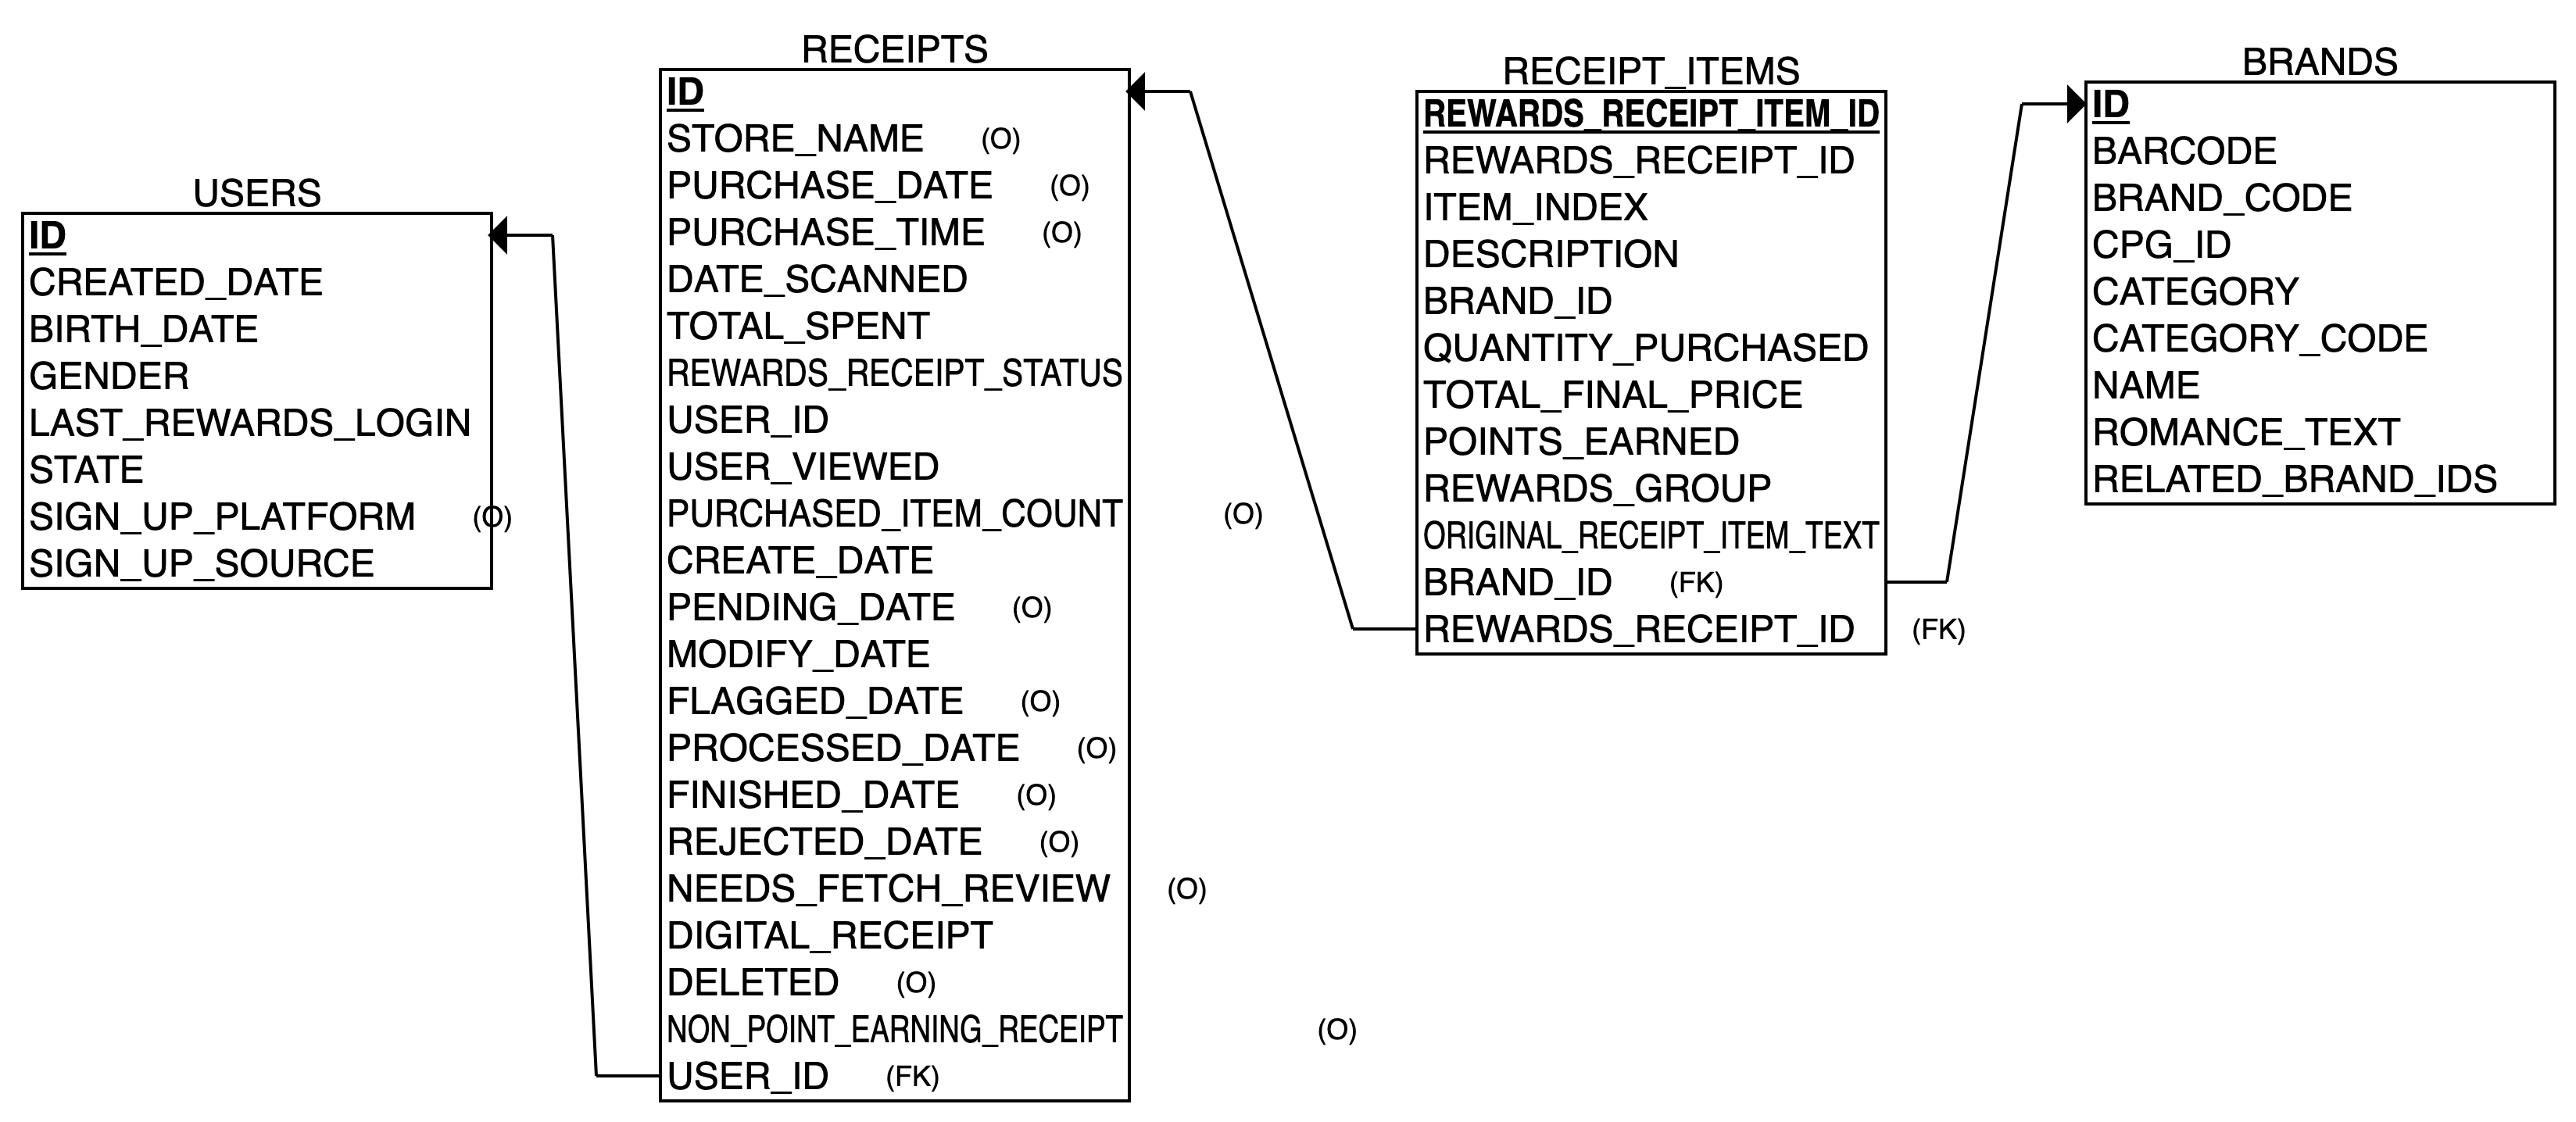

In [2]:
# First: Review Existing Data and Diagram a New Structured Relational Data Model
# Review the 4 sample data files provided below. 
# Develop a simplified, structured, relational diagram to represent how you would model the data in a data warehouse. 
# The diagram should show each table’s fields and the joinable keys. 
# You can use pencil and paper, readme, or any digital drawing or diagramming tool with which you are familiar. 
# If you can upload the text, image, or diagram into a git repository and we can read it, we will review it! 
im = Image.open('Downloads/image.png')
im

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dir_path = 'Downloads/Takehome_Data_January_2023/'
os.listdir(dir_path)

['receipts.csv', 'users.csv', 'brands.csv', 'receipt_items.csv']

In [5]:
receipts_df = pd.read_csv(dir_path + 'receipts.csv')
receipts_df.head()

,ID,STORE_NAME,PURCHASE_DATE,PURCHASE_TIME,DATE_SCANNED,TOTAL_SPENT,REWARDS_RECEIPT_STATUS,USER_ID,USER_VIEWED,PURCHASED_ITEM_COUNT,CREATE_DATE,PENDING_DATE,MODIFY_DATE,FLAGGED_DATE,PROCESSED_DATE,FINISHED_DATE,REJECTED_DATE,NEEDS_FETCH_REVIEW,DIGITAL_RECEIPT,DELETED,NON_POINT_EARNING_RECEIPT
0,62868f660a72546bef0b2dd0,TOWN OF ROCKY MOUNT,2022-05-19T00:00:00Z,2:05 PM,2022-05-19T18:41:42.53Z,859.87,FINISHED,61375682c625197c5db73602,True,1.0,2022-05-19T18:41:42.53Z,2022-05-19T18:57:57.228Z,2022-05-22T11:20:57.998Z,2022-05-19T18:42:57.042Z,NaN,2022-05-19T18:57:57.336Z,NaN,NaN,False,NaN,True
1,6096b7370a7216d316001149,NaN,NaN,NaN,2021-05-08T16:07:19.03Z,NaN,SUBMITTED,60047e8a2d7db612a69d2e18,True,NaN,2021-05-08T16:07:19.03Z,NaN,2021-05-08T16:07:19.03Z,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
2,6269a4ea0a7241077408b6e1,FAMILY DOLLAR,2022-04-27T00:00:00Z,4:15 PM,2022-04-27T20:17:46.09Z,11.00,FINISHED,61578e96c2fb9321213720fc,True,2.0,2022-04-27T20:17:46.09Z,2022-04-27T20:17:54.214Z,2022-04-27T20:17:55.521Z,NaN,NaN,2022-04-27T20:17:54.394Z,NaN,NaN,False,NaN,False
3,625b25e70a723eb9730d2c9c,PUBLIX,2022-04-15T00:00:00Z,4:45 PM,2022-04-16T20:24:07.259Z,10.67,FINISHED,6048de2ec9106b12d2b1ff61,True,4.0,2022-04-16T20:24:07.259Z,2022-04-16T20:24:23.399Z,2022-04-16T20:24:24.064Z,NaN,NaN,2022-04-16T20:24:23.598Z,NaN,NaN,False,NaN,False
4,60e3bd7e0a7215bd550fb8cc,COSTCO,2021-06-30T00:00:00Z,1:16 PM,2021-07-06T02:18:38.495Z,61.90,FINISHED,6048de2ec9106b12d2b1ff61,True,10.0,2021-07-06T02:18:38.495Z,2021-07-06T02:18:49.55Z,2021-07-06T02:18:51.906Z,NaN,NaN,2021-07-06T02:18:50.283Z,NaN,NaN,False,NaN,False


In [6]:
users_df = pd.read_csv(dir_path + 'users.csv')
users_df.head()

,CREATED_DATE,BIRTH_DATE,GENDER,LAST_REWARDS_LOGIN,STATE,SIGN_UP_PLATFORM,SIGN_UP_SOURCE,ID
0,2021-12-20T00:29:17.118Z,1984-03-20T00:00:00Z,transgender,2023-01-04T16:32:15Z,FL,NaN,Apple,61bfce5d6655417f803b6538
1,2021-10-21T17:15:25.825Z,1987-08-08T05:00:00Z,prefer_not_to_say,2023-01-04T16:04:33Z,PA,unknown,Google,6171a02d8034995a3d858fb3
2,2021-10-23T19:19:18.305Z,1995-06-18T05:00:00Z,male,2023-01-04T16:13:13Z,FL,NaN,Apple,617460366e2684498143e769
3,2021-03-30T02:35:41.249Z,1999-08-23T07:00:00Z,transgender,2023-01-04T16:09:51Z,MI,ios,Google,60628e7d85cdff011de41113
4,2021-04-26T23:15:54.375Z,1992-10-28T16:16:23Z,male,2023-01-04T16:24:18Z,CA,andrioid,Email,608749aac63a95130a45fbf4


In [7]:
brands_df = pd.read_csv(dir_path + 'brands.csv')
brands_df.head()

,ID,BARCODE,BRAND_CODE,CPG_ID,CATEGORY,CATEGORY_CODE,NAME,ROMANCE_TEXT,RELATED_BRAND_IDS
0,5a8c35dde4b0ccf165fac9e6,511111904175,PEPPERIDGE FARM,5a734034e4b0d58f376be874,Grocery,GROCERY,Pepperidge Farm,Pepperidge Farm has been making exceptional co...,NaN
1,6234af8f4e09b6067c237adb,511111212997,CHEX MIX,6233966e8942a67af4934aa1,Snacks,SNACKS,CHEX MIX,NaN,NaN
2,5332f7d3e4b03c9a25efd14e,511111803393,NaN,5332f5f2e4b03c9a25efd0aa,Snacks,SNACKS,Cheez-It,NaN,NaN
3,5d6412e9a3a018514994f426,511111304982,BETTER HOMES & GARDENS,53e10d6368abd3c7065097cc,Magazines,MAGAZINES,Better Homes & Gardens Magazine,Better Homes & Gardens offers beautiful photog...,5d6413156d5f3b23d1bc790a : 5d6417dda3a01851499...
4,621e777eacedc065cefa99a7,511111912859,TRUVIA,621e7754d759b10969cbcc08,Baking,BAKING,Truvia®,NaN,NaN


In [8]:
receipt_items_df = pd.read_csv(dir_path + 'receipt_items.csv')
receipt_items_df.head()

,REWARDS_RECEIPT_ID,ITEM_INDEX,REWARDS_RECEIPT_ITEM_ID,DESCRIPTION,BARCODE,BRAND_CODE,QUANTITY_PURCHASED,TOTAL_FINAL_PRICE,POINTS_EARNED,REWARDS_GROUP,ORIGINAL_RECEIPT_ITEM_TEXT,MODIFY_DATE
0,60bb28c10a720d557b128262,0,1efd6d7c75ecbae32214acb6cda41d12,RLGULAR SALE,NaN,NaN,1.0,9.99,NaN,NaN,RLGULAR SALE,2021-06-05T07:33:36.91Z
1,60bb28c10a720d557b128262,1,79482a8fa3bd0eef3d626f1c862042e8,82 GOURMET HOUSEW,000240292012,NaN,1.0,4.99,NaN,NaN,82 GOURMET HOUSEW,2021-06-05T07:33:36.91Z
2,627151230a724d730825106a,0,b26669cf4ce90cc9d7d3b0ab588cb04b,GOLDILOCKS NOPIA R BLAGK,NaN,NaN,1.0,4.75,NaN,NaN,GOLDILOCKS NOPIA R BLAGK,2022-05-03T15:58:41.769Z
3,627151230a724d730825106a,1,b4fafd04d8274a1e95b97155edaade2f,KURI-IRI DORAYAKI CAKE,NaN,NaN,1.0,5.99,NaN,NaN,KURI-IRI DORAYAKI CAKE,2022-05-03T15:58:41.769Z
4,627151230a724d730825106a,2,39694b0880b511e8a12bfb76cf2c20f3,YIZMANG FISH BALL,NaN,NaN,1.0,12.00,NaN,NaN,YIZMANG FISH BALL,2022-05-03T15:58:41.769Z


In [9]:
receipt_items_df['MODIFY_DATE'] = receipt_items_df['MODIFY_DATE'].astype('datetime64[ns]')
receipts_df['PURCHASE_DATE'] = receipts_df['PURCHASE_DATE'].astype('datetime64[ns]')

In [10]:
# Which brand saw the most dollars spent in the month of June?
sql_query = """
SELECT B.NAME, A.SPENT
FROM 
	(
		SELECT RI.BRAND_ID, SUM(RI.TOTAL_FINAL_PRICE) AS SPENT
        FROM RECEIPT_ITEMS RI
        WHERE MONTH(PURCHASE_DATE) = 6
        GROUP BY RI.BRAND_ID
	)	A INNER JOIN BRANDS B ON B.ID = A.BRAND_ID
ORDER BY A.SPENT DESC
LIMIT 1;
"""
receipt_items_df[receipt_items_df.MODIFY_DATE.dt.strftime("%B") == 'June'].groupby('BRAND_CODE').agg('sum')[['TOTAL_FINAL_PRICE']].sort_values('TOTAL_FINAL_PRICE', ascending = False).head(1)

,TOTAL_FINAL_PRICE
BRAND_CODE,
KIRKLAND SIGNATURE,2610.67


In [11]:
# Which user spent the most money in the month of August?
sql_query = """
SELECT R.USER_ID, SUM(R.TOTAL_SPENT) AS SPENT
FROM RECEIPTS R 
WHERE MONTH(R.PURCHASE_DATE) = 8
GROUP BY R.USER_ID
ORDER BY SPENT DESC
LIMIT 1;
"""
receipts_df[receipts_df.PURCHASE_DATE.dt.strftime("%B") == 'August'].groupby('USER_ID').agg('sum')[['TOTAL_SPENT']].sort_values('TOTAL_SPENT', ascending = False).head(1)

,TOTAL_SPENT
USER_ID,
609ab37f7a2e8f2f95ae968f,157739.14


In [13]:
# What user bought the most expensive item? 
# What is the name of the most expensive item purchased?
sql_query = """
SELECT R.USER_ID
FROM RECEIPTS R
WHERE R.ID = 
				(
					SELECT RI.REWARDS_RECEIPT_ID 
                    FROM RECEIPT_ITEMS RI 
                    ORDER BY RI.TOTAL_FINAL_PRICE DESC
                    LIMIT 1
				);
"""

sql_query = """
SELECT RI.ORIGINAL_RECEIPT_ITEM_TEXT 
FROM RECEIPT_ITEMS RI 
ORDER BY RI.TOTAL_FINAL_PRICE DESC
LIMIT 1;
"""
receipts_df.merge(receipt_items_df, left_on = "ID", right_on = "REWARDS_RECEIPT_ID").sort_values('TOTAL_FINAL_PRICE', ascending = False).head(1)[['USER_ID', 'TOTAL_FINAL_PRICE', 'ORIGINAL_RECEIPT_ITEM_TEXT']]

,USER_ID,TOTAL_FINAL_PRICE,ORIGINAL_RECEIPT_ITEM_TEXT
236166,617376b8a9619d488190e0b6,31005.99,STRBCKS IC CF BL


In [14]:
# How many users scanned in each month?

sql_query = """
SELECT MONTH(R.PURCHASE_DATE), COUNT(DISTINCT(R.USER_ID))
FROM RECEIPTS R
GROUP BY MONTH(R.PURCHASE_DATE);
"""
receipts_df.groupby(receipts_df.PURCHASE_DATE.dt.strftime('%B')).agg('sum')[['TOTAL_SPENT']]

,TOTAL_SPENT
PURCHASE_DATE,
April,192707.45
August,409344.28
December,412415.65
February,147216.54
January,190278.86
July,385498.88
June,253319.01
March,190359.91
May,234816.04


<AxesSubplot: title={'center': 'SPENDING OVER YEARS'}, xlabel='PURCHASE_DATE'>

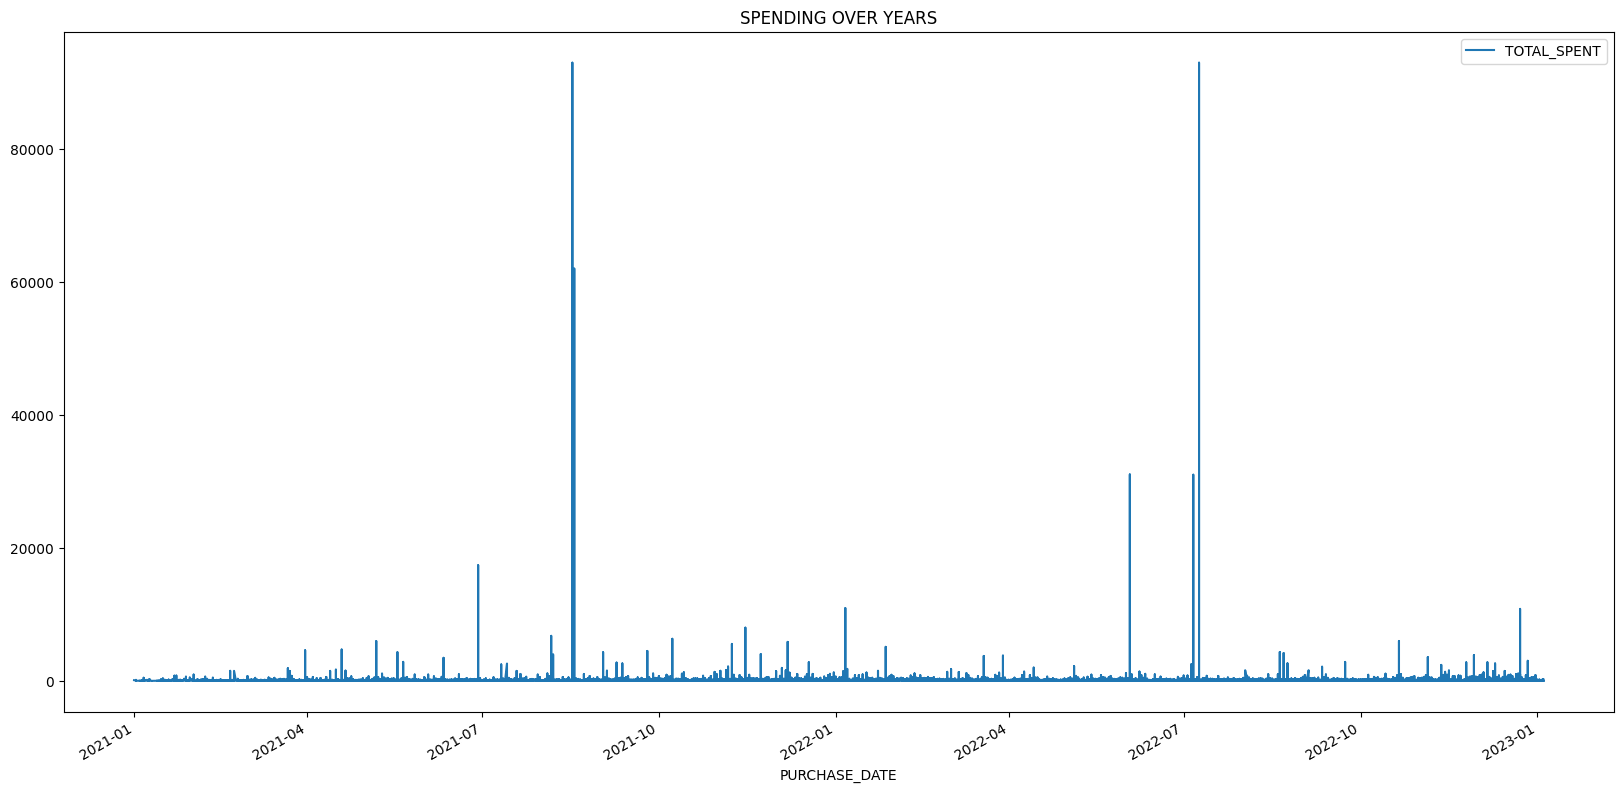

In [28]:
# Third: Choose something noteworthy about the data and share with a non-technical stakeholder
# After examining the dataset, choose something noteworthy to share with a non-technical stakeholder. 
# This can be anything. 
# Examples are anything you’ve noticed about the quality of the data, an interesting correlation or change in the data over time, etc. 
# Feel free to include visual aids or additional materials that help illustrate your noteworthy observation.
receipts_df[receipts_df.PURCHASE_DATE.dt.year > 2020].plot(kind = 'line', x = 'PURCHASE_DATE', y = 'TOTAL_SPENT', title = 'SPENDING OVER YEARS', figsize = (20, 10))

#### 1. According to the data one user has spent over \$155k within 6 hours at a BURLINGTON store.
#### 2. The most expensive item purchased is STARBUCKS ICED COFFEE 48oz which is worth almost \$31k (extremely unlikely).
#### 3. 5 Columns in the receipts table have more than 90% missing values.